# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 95% R로 분석 다시보기-2-treat-4-선형대수기초 대응분석관련-5 (45일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 두개의 범주형 변수의 관계 찾기 -- treat - 대응분석 정리

## 진료과목 중 내과만 자세히 살피기  -- 대응분석

## 대응분석 관련 정리 계속

대응분석을 설명하기 위해서는 몇가지 기본적인 내용의 정리가 필요합니다. 따라서 관련 내용을 먼저 정리 하고 진료 과목에 대한 대응 분석을 설명할 예정입니다.
여기서 대응분석이라는 것은 일반적으로 두개의 범주형 변수의 관계에 대한 독립성 여부는 카이제곱 분석에 의하여 P 검정을 살펴보게 됩니다.

그러나 다수준인 경우에는 분석시에 복잡한 양상을 띄게 됩니다. 따라서 이 경우에는 수준별 대응 분석을 하게 됩니다. 대응분석은 범주형 변수의 각 수준을 계량화하여 2차원 그래프 상에서 표현하여 두 범주형 변수가 변화는 관계를 살펴보는 것입니다.

이런 내용을 이해 하기 위해서는 선형 대수와 관련 해서 몇가지 기초적인 지식이 필요합니다.

####  예제들과 관련한 정리 (http://darkpgmr.tistory.com/105)
지금까지는 내용을 예제로서만 설명을 하여 따라갔지만, 그 이유에 대해서 간략하게 설명하고, 다음 SVD 관련 정리합니다.

SVD(특이값 분해) 부터 대응분석까지 진행 합니다.


### 특이값 분해
* 고유값은 $n \times n$ 정방형 행렬에 대해서 값을 구하는 것이라고 하면 특이값 *singular value* 는 $m \times n$ 행렬에서 고유값을 구하는 것이라고 하겠습니다.
* 고유값의 확장이라고 할 수 있습니다.

#### 고유값과 특이값 분해 차이점.

##### 1. 고유값 분해

* 고유값 분해는 $n \times n$ 정방행렬에 대해서 적용합니다.

* $\mathbf A = \mathbf P \mathbf \Lambda \mathbf P^{-1} = \mathbf P \mathbf \Lambda \mathbf P^T $
   * $\mathbf A$: $n \times n$ 정방행렬
   * $\mathbf P$: 고유벡터 $\mathrm v_i$ 로 이루어진 행렬
   * $\Lambda$: 고유값 $\lambda_i$ 로 이루어진 대각행렬, 편의상 $\lambda_1 \gt \lambda_2 \gt \cdots \gt \lambda_n$ 

##### 2. 특이값 분해

* 특이값분해는 $m \times n$ 사각행렬에 대해서 적용합니다.
* $\mathbf A = \mathbf U \mathbf \Sigma \mathbf V^T$
   * $\mathbf A$: $m \times n$ 직사각형 행렬 ($m \gt n$)
   * $\mathbf U$: $\mathbf A$ 의 left singular vector 로 이루어진 $m \times m$ unitary 또는 직교  행렬
   * $\Sigma$: 주 대각성분이 $\sqrt{\lambda_i}$ 가  $\mathbf A \mathbf A^T$ 의 고유값으로 이루어진 $m \times n$ 사각행렬
   * $\mathbf V$: $\mathbf A$ 의 right singular vector 로 이루어진 $n \times n$ unitary 또는 직교  행렬

##### 3. $\mathbf U, \mathbf \Sigma, \mathbf V$ 의 일반적인 성질

* 행렬 $\mathbf A$ 의 계수 가 k 라고 할때, 즉 Rank(A) = k 일때
* $\mathbf U = \{u_1, u_2,\cdots,u_k, u_{k+1},\cdots,u_m \}$ 은  $\mathbf A \mathbf A^T$ 를 고유값 분해하여 얻은 $m \times m$ 직교행렬(또는 유니타리(복소수일경우) 이며, $[u_1, u_2, \cdots, u_k]$ 를 좌특이벡터 (left singular vector, gene coefficient vectors) 라고 합니다.
* $\mathbf V = \{v_1, v_2,\cdots,v_k, v_{k+1},\cdots,v_n \}$ 은  $\mathbf A^T \mathbf A$ 를 고유값 분해하여 얻은 $n \times n$ 직교행렬(또는 유니타리(복소수일경우) 이며, $[v_1, v_2, \cdots, v_k]$ 를 우특이벡터 (right singular vector, expression level vectors) 라고 합니다.
* $\Sigma$ 는 $m \times n$ 대각선 행렬이고 $\mathbf A \mathbf A^T$ 의 고유값이 0 이 아닌 $\lambda_1, \lambda_2, \cdots, \lambda_k$ 일때 $\sqrt{\lambda_1},\sqrt{\lambda_2},\cdots,\sqrt{\lambda_k}$ 를 대각성분으로 가지며, 나머지 성분은 0이다.
* $\Sigma$ 의 대각성 성분은 $\sigma_1, \sigma_2, \cdots, \sigma_k, \cdots$ 로 표사합니다.
* $\mathbf U, \mathbf V$ 는 직교행렬이므로, $\mathbf U \mathbf U^T = \mathbf V \mathbf V^T = \mathbf I$ 입니다.

##### 4. Reduced SVD (rSVD)

* 실제문제에서는 계산량을 줄이기 위해서 $\mathbf U, \mathbf V$ 의 0 이 되는 부분을 제외하고 처리합니다.
* 즉 $\mathbf A$ 가 rank(A) = k 이고 $m \times n$ 행렬이면, 
    * $\hat{\mathbf U}$ 는 $m \times k$ 행렬
    * $\hat{\mathbf \Sigma}$ 는 $k \times k$ 행렬
    * $\hat{\mathbf V}$ 는 $k \times n$ 행렬이 됩니다. 
    * $\hat X$ 표시는 0 을 제외한 것이라서 다르게 표시한것 입니다.

##### 5. 작업절차

0. 특이값(고유값)을  $\mathbf A \mathbf A^T$ 로 부터 구한다.
1. $\mathbf A \mathbf A^T$ 로 고유값을 구하고 고유벡터 $\mathbf U$ 를 구한다.
2. $\mathbf A \mathbf A^T$ 로 고유벡터 $\mathbf V^T$ 를 구한다.
3. $\mathbf A \mathbf A^T$ 의 고유값의 제곱근을 특이값 대각원소를 갖는 $\Sigma$ 를 구한다.

##### 6. SVD 적용분야

* 데이터 축소 (Data Reduction)
* 최소제곱해 문제(Solving linear least square Problems)
* 영상처리 및 압축(Image Processing and Compression)
* 데이터 군집화에서 군집개수 결정(k-Selection for k-means clustering)
* 이상치 감지(Multivariate Outliers Detection)
* 잡음제거(Noise Filtering)
* 경향 분석(Trend detection in the observations and the variables)
* 행렬의 rank 결정

##### 7. 예제들...

##### 7.1 간단한 SVD 구하는 절차

In [1]:
#7.1 간단하게 SVD 구하는 절차들
A = matrix(c(3, 2, 0, 0, 6, 3, 0, 0), nc=2, byrow = FALSE)
print(A)

     [,1] [,2]
[1,]    3    6
[2,]    2    3
[3,]    0    0
[4,]    0    0


In [2]:
# 전치행렬
print(t(A))

     [,1] [,2] [,3] [,4]
[1,]    3    2    0    0
[2,]    6    3    0    0


In [8]:
# U 행렬 구하기
# 행렬 A 와 A 의 전치행렬 곱하기
W_1 = A %*% t(A)
print(W_1)

     [,1] [,2] [,3] [,4]
[1,]   45   24    0    0
[2,]   24   13    0    0
[3,]    0    0    0    0
[4,]    0    0    0    0


In [9]:
# W 의 고유값, 고유벡터 구하기
evu = eigen(W_1)
print(evu)

eigen() decomposition
$values
[1] 57.8444102  0.1555898  0.0000000  0.0000000

$vectors
          [,1]       [,2] [,3] [,4]
[1,] 0.8816746 -0.4718579    0    0
[2,] 0.4718579  0.8816746    0    0
[3,] 0.0000000  0.0000000    0    1
[4,] 0.0000000  0.0000000    1    0



In [11]:
# 최종으로 U 행렬 가져오기
U = evu$vectors
print(U)

          [,1]       [,2] [,3] [,4]
[1,] 0.8816746 -0.4718579    0    0
[2,] 0.4718579  0.8816746    0    0
[3,] 0.0000000  0.0000000    0    1
[4,] 0.0000000  0.0000000    1    0


In [12]:
# V 행렬구하기
# A 의 전치행렬과 A 곱하기
W_2 = t(A) %*% A
print(W_2)

     [,1] [,2]
[1,]   13   24
[2,]   24   45


In [13]:
# W_2 의 고유값, 고유치 구하기
evv = eigen(W_2)
print(evv)

eigen() decomposition
$values
[1] 57.8444102  0.1555898

$vectors
          [,1]       [,2]
[1,] 0.4718579 -0.8816746
[2,] 0.8816746  0.4718579



In [14]:
# 행렬 V 가져오기
V = evv$vectors
print(V)

          [,1]       [,2]
[1,] 0.4718579 -0.8816746
[2,] 0.8816746  0.4718579


In [18]:
# 대각행렬 Sigma 구하기
W_2_eigenvalue = sqrt(evv$values)
print(W_2_eigenvalue)

[1] 7.6055513 0.3944487


In [19]:
# 먼저 0을 채워진 대각선 행렬
S = matrix(rep(0,8), nc=2)
print(S)

     [,1] [,2]
[1,]    0    0
[2,]    0    0
[3,]    0    0
[4,]    0    0


In [20]:
# 구한 고유값을 S 에 넣기
S[1,1] = W_2_eigenvalue[1]
S[2,2] = W_2_eigenvalue[2]

print(S)

         [,1]      [,2]
[1,] 7.605551 0.0000000
[2,] 0.000000 0.3944487
[3,] 0.000000 0.0000000
[4,] 0.000000 0.0000000


$\mathbf U, \mathbf V, \mathbf \Sigma$ 를 다 구했습니다.

##### 7.2 이것을 한방에  구하기

In [21]:
print(A)

     [,1] [,2]
[1,]    3    6
[2,]    2    3
[3,]    0    0
[4,]    0    0


In [22]:
A.svd = svd(A)

In [23]:
print(A.svd)

$d
[1] 7.6055513 0.3944487

$u
           [,1]       [,2]
[1,] -0.8816746 -0.4718579
[2,] -0.4718579  0.8816746
[3,]  0.0000000  0.0000000
[4,]  0.0000000  0.0000000

$v
           [,1]       [,2]
[1,] -0.4718579  0.8816746
[2,] -0.8816746 -0.4718579



##### 7.3 SVD 를 이용한 역행렬

In [24]:
# 데이터 가져오기
library(MASS)

In [26]:
a <- matrix(c(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1), 9, 4)
print(a)

      [,1] [,2] [,3] [,4]
 [1,]    1    1    0    0
 [2,]    1    1    0    0
 [3,]    1    1    0    0
 [4,]    1    0    1    0
 [5,]    1    0    1    0
 [6,]    1    0    1    0
 [7,]    1    0    0    1
 [8,]    1    0    0    1
 [9,]    1    0    0    1


In [27]:
a.svd = svd(a)
print(a.svd)

$d
[1] 3.464102e+00 1.732051e+00 1.732051e+00 1.922963e-16

$u
            [,1]       [,2]          [,3]          [,4]
 [1,] -0.3333333  0.4714045 -1.741269e-16  7.760882e-01
 [2,] -0.3333333  0.4714045 -3.692621e-16 -1.683504e-01
 [3,] -0.3333333  0.4714045 -5.301858e-17 -6.077378e-01
 [4,] -0.3333333 -0.2357023 -4.082483e-01  6.774193e-17
 [5,] -0.3333333 -0.2357023 -4.082483e-01  6.774193e-17
 [6,] -0.3333333 -0.2357023 -4.082483e-01  6.774193e-17
 [7,] -0.3333333 -0.2357023  4.082483e-01  5.194768e-17
 [8,] -0.3333333 -0.2357023  4.082483e-01  5.194768e-17
 [9,] -0.3333333 -0.2357023  4.082483e-01  5.194768e-17

$v
           [,1]       [,2]          [,3] [,4]
[1,] -0.8660254  0.0000000 -4.378026e-17  0.5
[2,] -0.2886751  0.8164966 -2.509507e-16 -0.5
[3,] -0.2886751 -0.4082483 -7.071068e-01 -0.5
[4,] -0.2886751 -0.4082483  7.071068e-01 -0.5



In [28]:
ds = diag(1/a.svd$d[1:3])
print(ds)

          [,1]      [,2]      [,3]
[1,] 0.2886751 0.0000000 0.0000000
[2,] 0.0000000 0.5773503 0.0000000
[3,] 0.0000000 0.0000000 0.5773503


In [29]:
u = a.svd$u
print(u)

            [,1]       [,2]          [,3]          [,4]
 [1,] -0.3333333  0.4714045 -1.741269e-16  7.760882e-01
 [2,] -0.3333333  0.4714045 -3.692621e-16 -1.683504e-01
 [3,] -0.3333333  0.4714045 -5.301858e-17 -6.077378e-01
 [4,] -0.3333333 -0.2357023 -4.082483e-01  6.774193e-17
 [5,] -0.3333333 -0.2357023 -4.082483e-01  6.774193e-17
 [6,] -0.3333333 -0.2357023 -4.082483e-01  6.774193e-17
 [7,] -0.3333333 -0.2357023  4.082483e-01  5.194768e-17
 [8,] -0.3333333 -0.2357023  4.082483e-01  5.194768e-17
 [9,] -0.3333333 -0.2357023  4.082483e-01  5.194768e-17


In [30]:
v = a.svd$v
print(v)

           [,1]       [,2]          [,3] [,4]
[1,] -0.8660254  0.0000000 -4.378026e-17  0.5
[2,] -0.2886751  0.8164966 -2.509507e-16 -0.5
[3,] -0.2886751 -0.4082483 -7.071068e-01 -0.5
[4,] -0.2886751 -0.4082483  7.071068e-01 -0.5


In [31]:
us = as.matrix(u[, 1:3])
print(us)

            [,1]       [,2]          [,3]
 [1,] -0.3333333  0.4714045 -1.741269e-16
 [2,] -0.3333333  0.4714045 -3.692621e-16
 [3,] -0.3333333  0.4714045 -5.301858e-17
 [4,] -0.3333333 -0.2357023 -4.082483e-01
 [5,] -0.3333333 -0.2357023 -4.082483e-01
 [6,] -0.3333333 -0.2357023 -4.082483e-01
 [7,] -0.3333333 -0.2357023  4.082483e-01
 [8,] -0.3333333 -0.2357023  4.082483e-01
 [9,] -0.3333333 -0.2357023  4.082483e-01


In [32]:
vs = as.matrix(v[,1:3])
print(vs)

           [,1]       [,2]          [,3]
[1,] -0.8660254  0.0000000 -4.378026e-17
[2,] -0.2886751  0.8164966 -2.509507e-16
[3,] -0.2886751 -0.4082483 -7.071068e-01
[4,] -0.2886751 -0.4082483  7.071068e-01


In [33]:
a.ginv = vs %*% ds %*% t(us)
print(a.ginv)

            [,1]        [,2]        [,3]        [,4]        [,5]        [,6]
[1,]  0.08333333  0.08333333  0.08333333  0.08333333  0.08333333  0.08333333
[2,]  0.25000000  0.25000000  0.25000000 -0.08333333 -0.08333333 -0.08333333
[3,] -0.08333333 -0.08333333 -0.08333333  0.25000000  0.25000000  0.25000000
[4,] -0.08333333 -0.08333333 -0.08333333 -0.08333333 -0.08333333 -0.08333333
            [,7]        [,8]        [,9]
[1,]  0.08333333  0.08333333  0.08333333
[2,] -0.08333333 -0.08333333 -0.08333333
[3,] -0.08333333 -0.08333333 -0.08333333
[4,]  0.25000000  0.25000000  0.25000000


In [34]:
# 이것은 직접 구한 것과 같다.
print(ginv(a))

            [,1]        [,2]        [,3]        [,4]        [,5]        [,6]
[1,]  0.08333333  0.08333333  0.08333333  0.08333333  0.08333333  0.08333333
[2,]  0.25000000  0.25000000  0.25000000 -0.08333333 -0.08333333 -0.08333333
[3,] -0.08333333 -0.08333333 -0.08333333  0.25000000  0.25000000  0.25000000
[4,] -0.08333333 -0.08333333 -0.08333333 -0.08333333 -0.08333333 -0.08333333
            [,7]        [,8]        [,9]
[1,]  0.08333333  0.08333333  0.08333333
[2,] -0.08333333 -0.08333333 -0.08333333
[3,] -0.08333333 -0.08333333 -0.08333333
[4,]  0.25000000  0.25000000  0.25000000


##### 7.4 이미지 처리


In [73]:
#install.package("devtools)
#devtools::install_github("cran/ReadImages")

In [74]:
library(ReadImages)

In [80]:
x = read.jpeg("pansy.jpg")
dim(x)

[1] 700 700   3

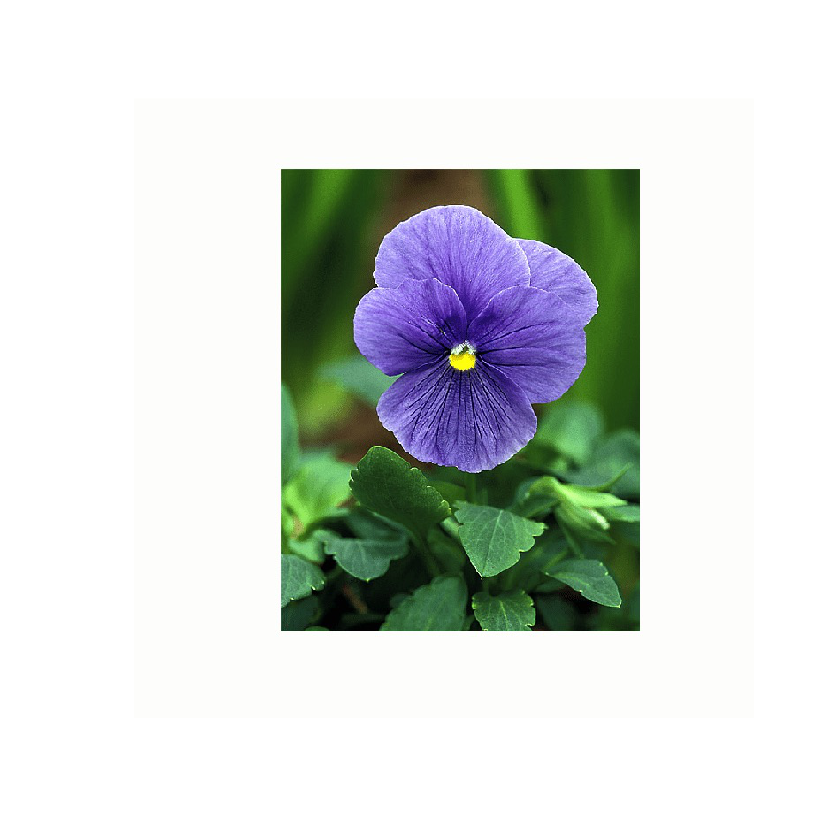

In [81]:
plot(x)

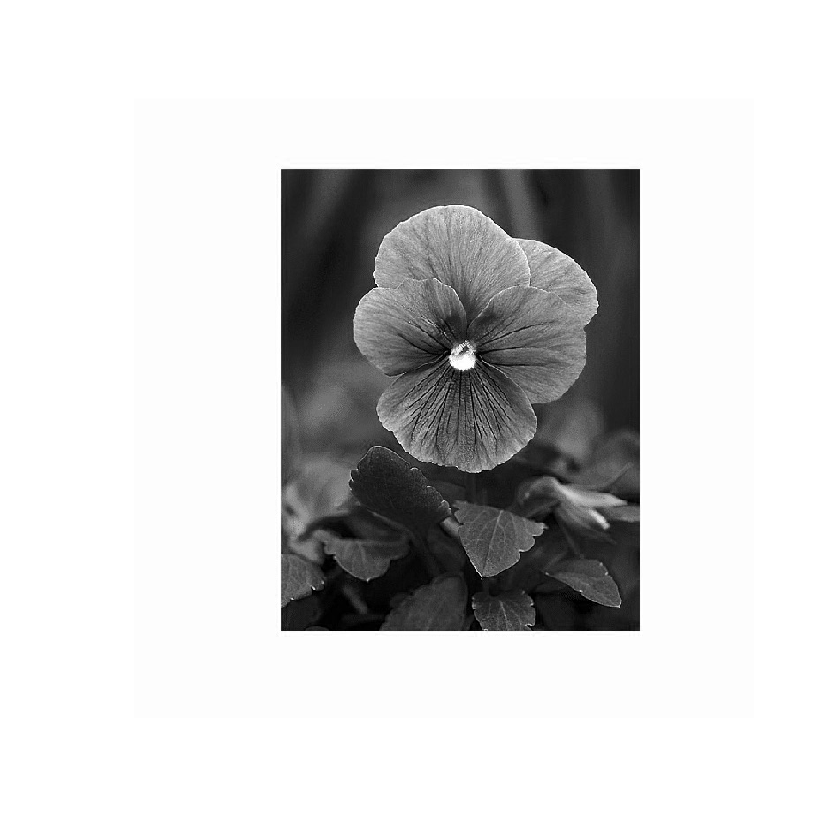

In [83]:
r = imagematrix(x, type = "grey")
plot(r)

In [85]:
r.svd = svd(r)

In [87]:
d = diag(r.svd$d)
dim(d)

[1] 700 700

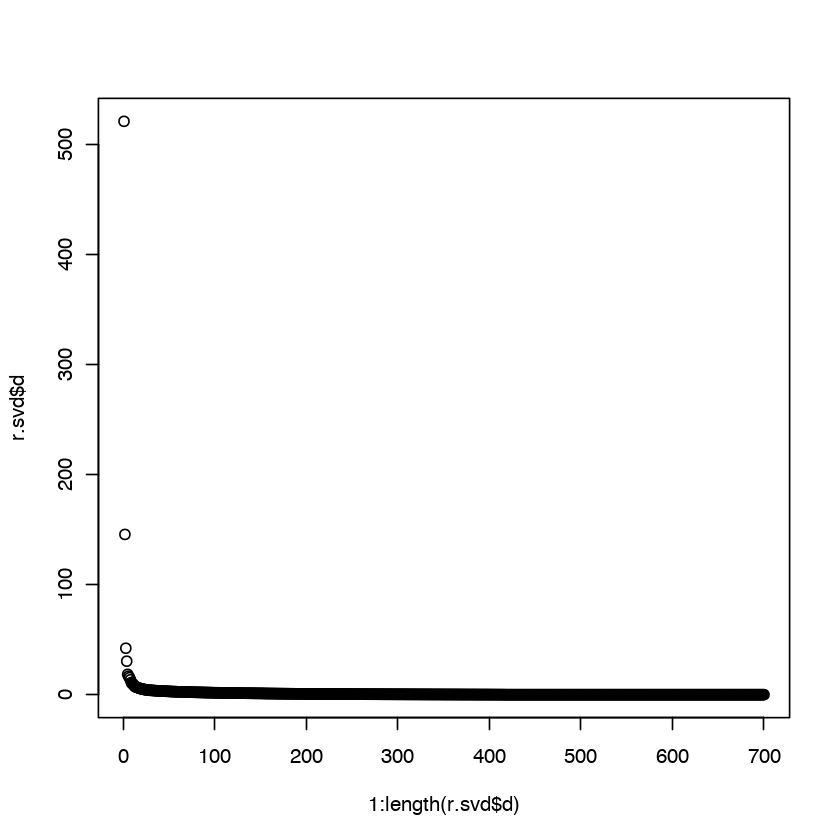

In [88]:
u = r.svd$u
v = r.svd$v
plot(1:length(r.svd$d), r.svd$d)

Warning message in imagematrix(l1, type = "grey"):
“Pixel values were automatically clipped because of range over.”

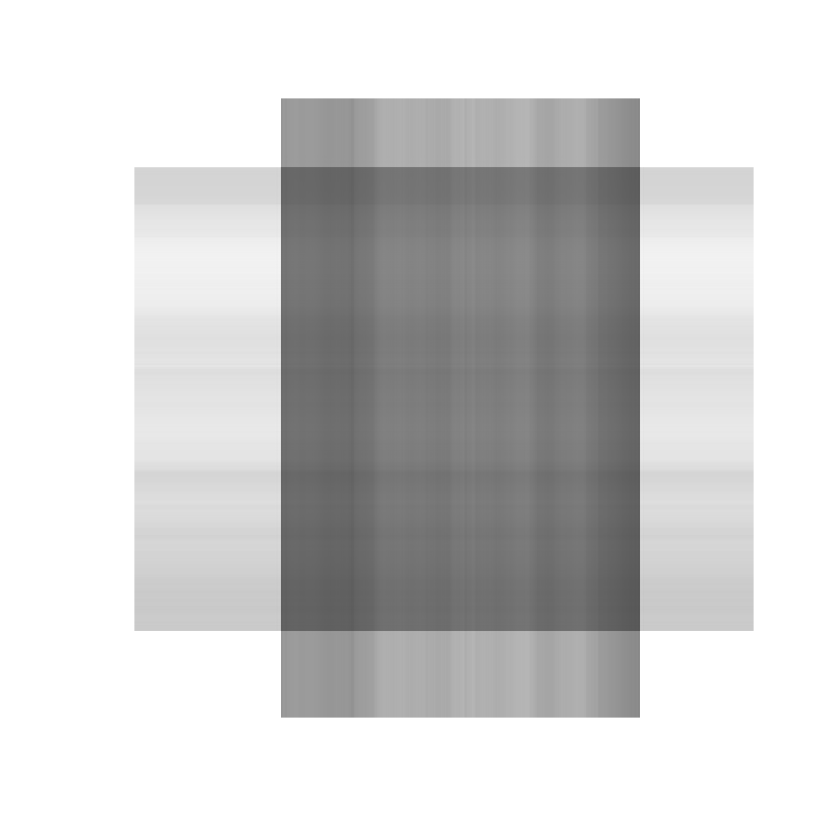

In [89]:
# 1차 
u1 = as.matrix(u[-1, 1])
v1 = as.matrix(v[-1, 1])
d1 = as.matrix(d[1, 1])
l1 = u1 %*% d1 %*% t(v1)
l1g = imagematrix(l1, type = "grey")
plot(l1g, useRaster = TRUE)

In [90]:
# more approximation
depth <- 5
us <- as.matrix(u[, 1:depth])
vs <- as.matrix(v[, 1:depth])
ds <- as.matrix(d[1:depth, 1:depth])
ls <- us %*% ds %*% t(vs)
lsg <- imagematrix(ls, type = "grey")

Warning message in imagematrix(ls, type = "grey"):
“Pixel values were automatically clipped because of range over.”

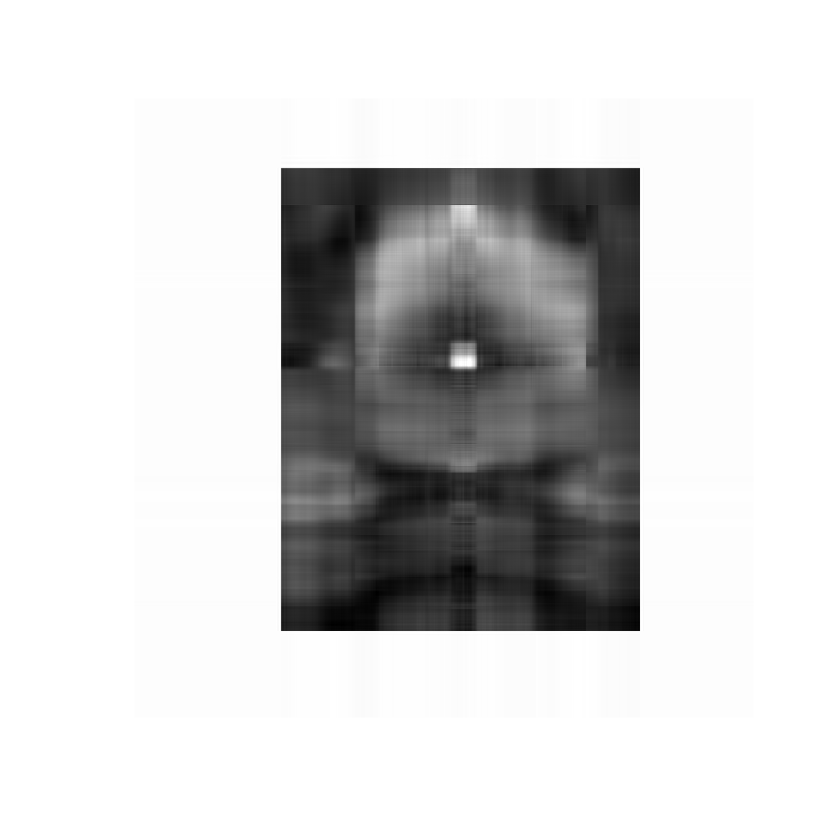

In [91]:
plot(lsg, useRaster = TRUE)

In [92]:
# more approximation
depth <- 60
us <- as.matrix(u[, 1:depth])
vs <- as.matrix(v[, 1:depth])
ds <- as.matrix(d[1:depth, 1:depth])
ls <- us %*% ds %*% t(vs)
lsg <- imagematrix(ls, type = "grey")

Warning message in imagematrix(ls, type = "grey"):
“Pixel values were automatically clipped because of range over.”

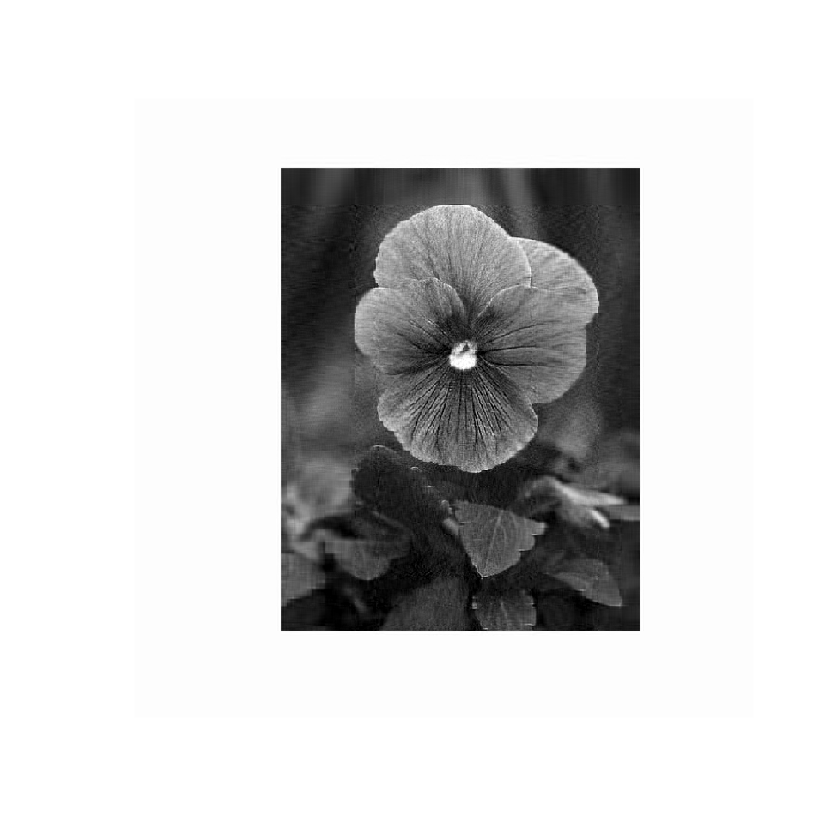

In [93]:
plot(lsg, useRaster = TRUE)

##### 7.5 SVD 사용해서 PCA (Principal Components Analysis: 주성분 분석)

* prcomp 를 이용해서 principal components 를 plot 하고
* 다음에 SVD 나 correlation matrix 를 이용하여 같은 값을 찿을 것입니다.

In [94]:
library(foreign)

In [95]:
auto <- read.dta("http://statistics.ats.ucla.edu/stat/data/auto.dta")

In [96]:
head(auto)

make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
AMC Concord,4099,22,3,2.5,11,2930,186,40,121,3.58,Domestic
AMC Pacer,4749,17,3,3.0,11,3350,173,40,258,2.53,Domestic
AMC Spirit,3799,22,NA,3.0,12,2640,168,35,121,3.08,Domestic
Buick Century,4816,20,3,4.5,16,3250,196,40,196,2.93,Domestic
Buick Electra,7827,15,4,4.0,20,4080,222,43,350,2.41,Domestic
Buick LeSabre,5788,18,3,4.0,21,3670,218,43,231,2.73,Domestic


In [98]:
pca.m1 <- prcomp(~trunk + weight + length + headroom, data = auto, scale = TRUE)

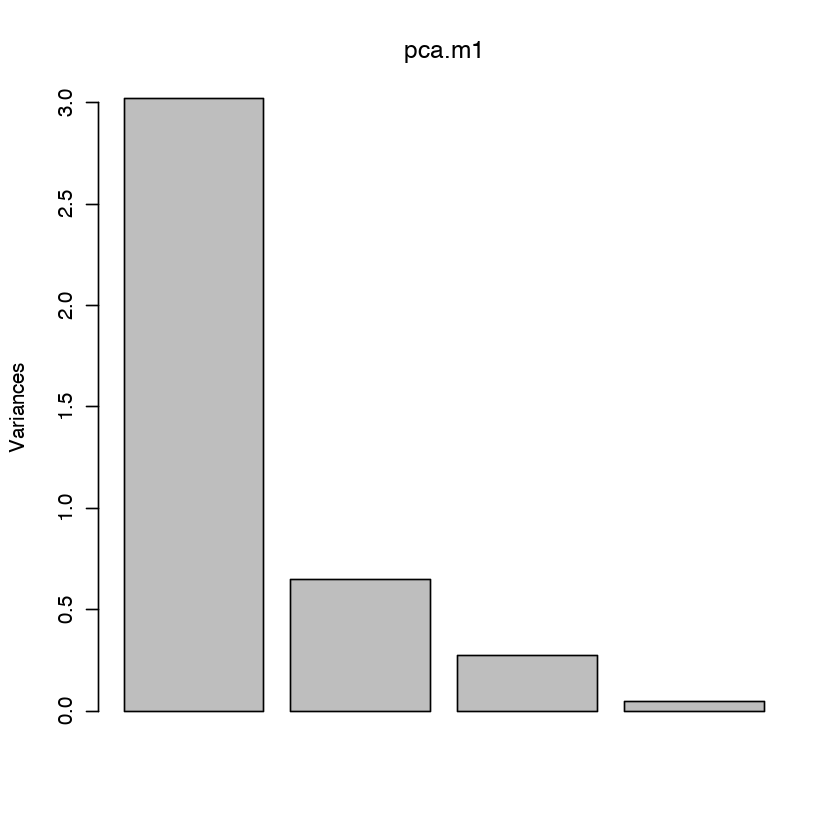

In [99]:
screeplot(pca.m1)

In [101]:
# 방법 1 spectral decomposition: eigen values and eigen vectors
xvars <- with(auto, cbind(trunk, weight, length, headroom))
corr <- cor(xvars)
a <- eigen(corr)
std <- sqrt(a$values)
print(std)

[1] 1.7378931 0.8074981 0.5264150 0.2248592


In [102]:
rotation = a$vectors
print(rotation)

           [,1]       [,2]       [,3]         [,4]
[1,] -0.5067777 -0.2326998  0.8249462  0.092145980
[2,] -0.5220823  0.4535800 -0.2677106  0.670839942
[3,] -0.5361131  0.3903201 -0.1370497 -0.735833101
[4,] -0.4280061 -0.7666591 -0.4785521 -0.005704251


In [104]:
#방법 2 SVD 방법
df <- nrow(xvars) - 1
zvars <- scale(xvars)
z.svd <- svd(zvars)
print(z.svd$d/sqrt(df))

[1] 1.7378931 0.8074981 0.5264150 0.2248592


In [105]:
print(z.svd$v)

          [,1]       [,2]       [,3]         [,4]
[1,] 0.5067777 -0.2326998  0.8249462 -0.092145980
[2,] 0.5220823  0.4535800 -0.2677106 -0.670839942
[3,] 0.5361131  0.3903201 -0.1370497  0.735833101
[4,] 0.4280061 -0.7666591 -0.4785521  0.005704251
